In [16]:
# to install all dependencies use, uncomment the following line and restart the kernel
# %pip install -U -r requirements.txt

# Un/Supervised learning of Temporally Heterogeneous Connections in spiking neurons


We design a model based on heterosynaptic delays. We will define in the assembly of neurons where each synapse
is defined by a weight *ws* at different delays *τs*. See the following figure: 

**Abstract:** The response of a biological neuron depends on the precise timing of afferent spikes. This temporal aspect of the neuronal code is essential in understanding information processing in neurobiology and applies particularly well to the output of neuromorphic hardware such as event-based cameras. Though, most artificial neuronal models do not take advantage of this minute temporal dimension and here, we develop a model for the efficient detection of temporal spiking motifs based on a layer of neurons with heterogeneous delays. Indeed, the variety of synaptic delays on the dendritic tree allows to synchronize synaptic inputs as they reach the basal dendritic tree. We show this can be formalized as time-invariant logistic regression which can trained using labelled data. We apply this model for solving the specific problem of detecting motion and demonstrate its use by applying it on synthetic naturalistic videos transformed to event-based streams similar to the output of a silicon retina. In particular, we show how its accuracy may evolve as a function of the total computational load. This end-to-end event-based computational brick could help improve the performance of future Spiking Neural Network solutions currently used in neuromorphic chips.

In [17]:
from brainhack import Params
opt = Params()
opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=4.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

### generative & inference models for polychronous groups

In [18]:
from brainhack import *



In [19]:
env = ABCD(opt)

In [20]:
env.opt

Params(datetag='2022-11-28', N_pre=144, N_PG_time=71, N_PGs=35, E_PG=4.0, p_PG=0.005, tau_decay=0.4, tau_rise=0.05, N_time=1024, N_trials=10, p_B=0.001, p_A=0.001, seed=42, verbose=False, fig_width=12, phi=1.61803, N_PG_show=5)

#### dev sandox

In [21]:
len(env.spike)//2, env.spike.shape

(17, torch.Size([35, 35, 3]))

In [22]:
env = ABCD(opt)
a, b, PG = env.generative_model()

In [23]:
a.min(), a.max()

(tensor(0.), tensor(1.))

In [24]:
env.temporal_mod.shape

torch.Size([144, 35, 71])

In [25]:
PG.shape

torch.Size([144, 35, 71])

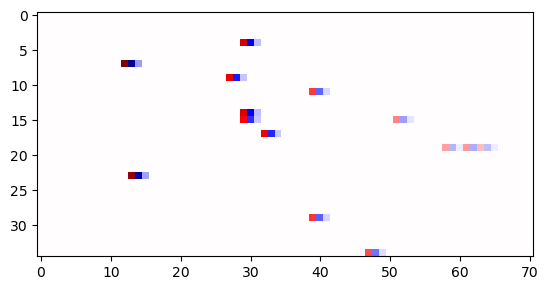

In [26]:
vmax = PG[0, :, :].abs().max()
plt.imshow(PG[0, :, :], cmap='seismic', vmin=-vmax, vmax=vmax)

# generative model for polychronous groups

In [27]:
opt = Params()
env = ABCD(opt)
a, b, PG = env.generative_model()
# env.plot_PG(PG);
# TODO find a better rule to generate PGs

Draw one instance of single PGs:

Draw the occurrences of PGs:

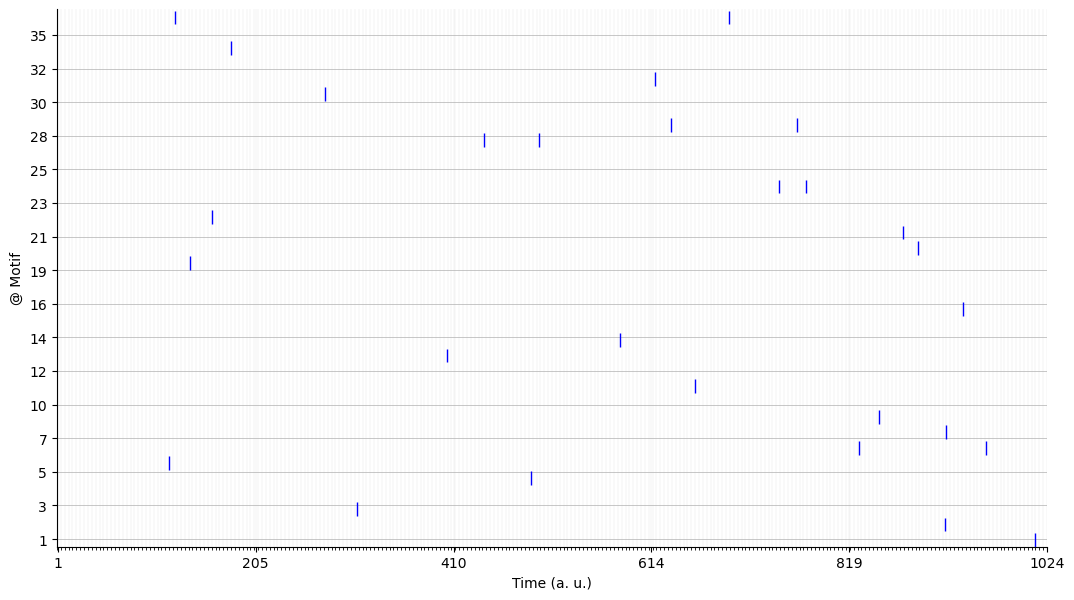

In [28]:
env.plot_b(b);

Resulting raster plot:

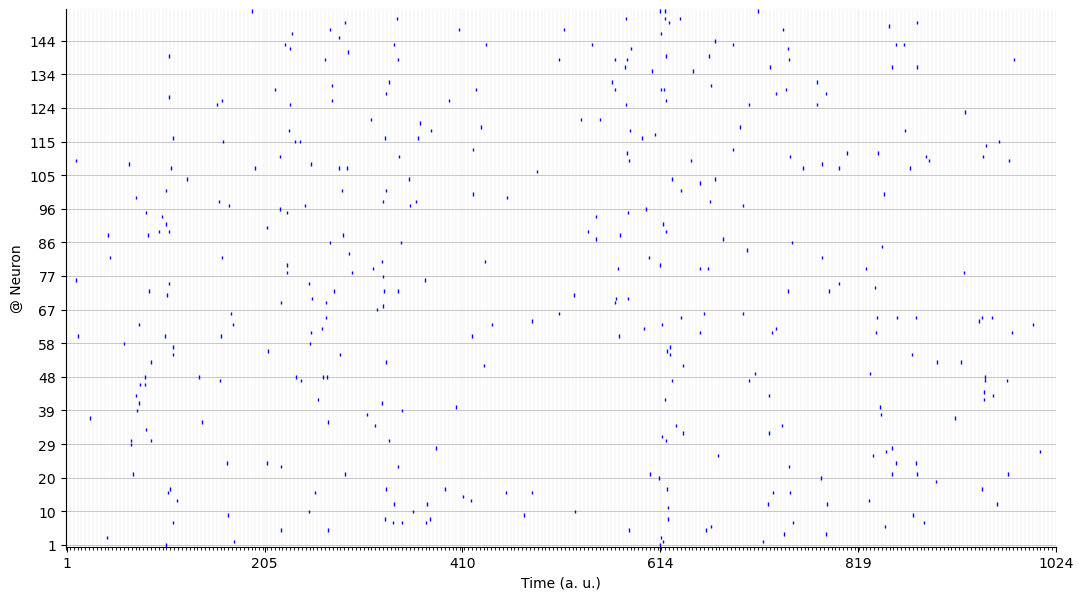

In [29]:
env.plot_a(a, i_trial=7);
# TODO correct this firing rate

In [30]:
a.mean(), b.mean(), b.mean(axis=(0, -1))

(tensor(0.003),
 tensor(0.001),
 tensor([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.000, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001,
         0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.000, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]))

# inference model for polychronous groups

knowing the raster plot `a`, let's try to infer `b` :

(<Figure size 1200x741.643 with 1 Axes>,
 <AxesSubplot: xlabel='value of b_hat', ylabel='smarts'>)

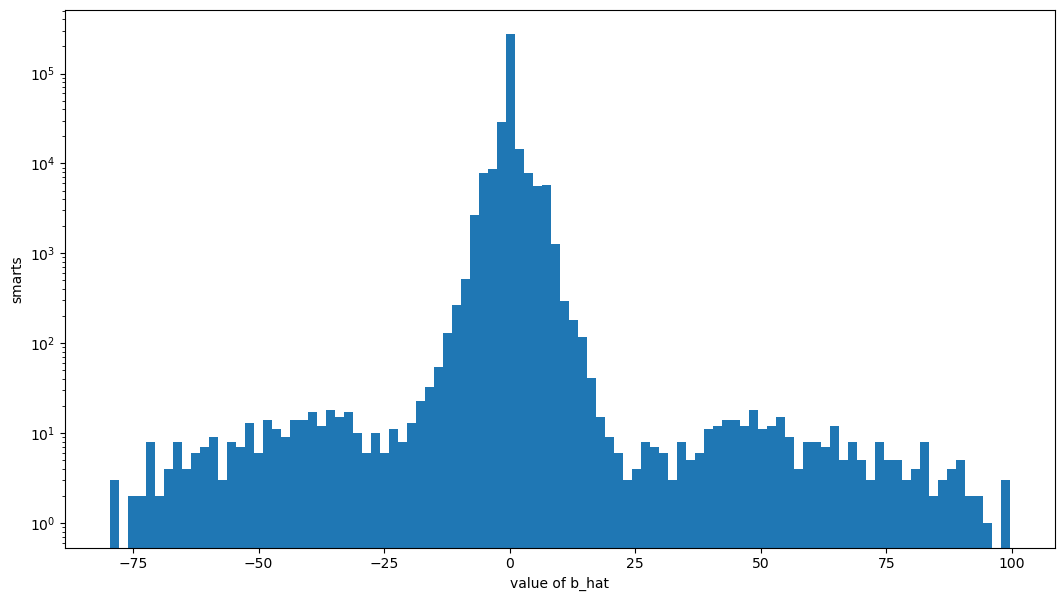

In [31]:
b_hat, b_hat_bin = env.inference_with_PGs(a, b, PG)
env.plot_inference_histo(b_hat)

(<Figure size 1200x741.643 with 3 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object))

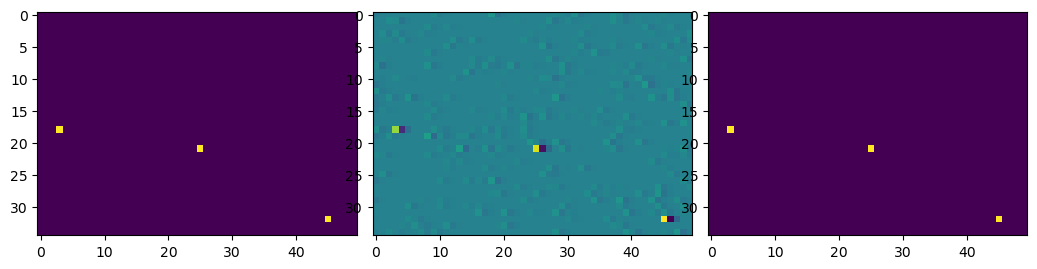

In [32]:
env.plot_inference(b, b_hat, b_hat_bin)

## test model, learning 

In [33]:
%%timeit
accuracy, TP, TN = env.test_model(PG, PG)

139 ms ± 11.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
accuracy, TP, TN = env.test_model(PG, PG)
print(f'accuracy={accuracy.item()*100:.2f}%, TP={TP.item()*100:.2f}%, TN={TN.item()*100:.2f}%')

accuracy=100.00%, TP=97.73%, TN=100.00%


## Figure 1

In [35]:
N_PGs = 4
opt_fig1 = Params(  datetag = datetag + '_fig1',
                    N_pre = 10, 
                    N_PGs = N_PGs,
                    N_PG_time = 71,
                    p_PG = .07,
                    p_A = 0.01,
                    p_B = 0.001,
                    N_PG_show = N_PGs,
                    N_trials = 1,
                    N_time = 240,
                    seed = 2373,
                    fig_width = 3.25,
                    )
                    
env_fig1 = ABCD(opt_fig1)
# a, b, PG = env_fig1.generative_model()
PG = env_fig1.set_PG(seed=opt_fig1.seed)
b = env_fig1.get_b(seed=opt_fig1.seed+1)

In [36]:
opt_fig1, env_fig1.opt, env_fig1.opt.N_pre, env_fig1.opt.N_PGs


(Params(datetag='2022-11-28_fig1', N_pre=10, N_PG_time=71, N_PGs=4, E_PG=4.0, p_PG=0.07, tau_decay=0.4, tau_rise=0.05, N_time=240, N_trials=1, p_B=0.001, p_A=0.01, seed=2373, verbose=False, fig_width=3.25, phi=1.61803, N_PG_show=4),
 Params(datetag='2022-11-28_fig1', N_pre=10, N_PG_time=71, N_PGs=4, E_PG=4.0, p_PG=0.07, tau_decay=0.4, tau_rise=0.05, N_time=240, N_trials=1, p_B=0.001, p_A=0.01, seed=2373, verbose=False, fig_width=3.25, phi=1.61803, N_PG_show=4),
 10,
 4)

In [37]:
env_fig1.opt.N_pre, env_fig1.opt.N_PGs, env_fig1.opt.N_PG_time

(10, 4, 71)

In [38]:
subplotpars_fig1 = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0.08, hspace=0.05,)
figsize = (env_fig1.opt.fig_width, env_fig1.opt.fig_width/env_fig1.opt.phi)
colors = ['r', 'g' , 'b' , 'm']
shift = -0.13

In [39]:
#b[0, 3, 350] = True
#b[0, 2, 350] = True
#b[0, 1, 150] = True
b[0, 0, 50] = True
b[0, 3, 180] = True
#b[0, 3, 42] = True
b[0, 1, 201] = True
b[0, 1, 114] = True
b[0, 2, 42] = True
b[0, 2, 104] = True
#b[0, 0, 50] = True
b.shape

torch.Size([1, 4, 240])

In [40]:
PG.shape

torch.Size([10, 4, 71])

In [41]:
PG.mean(), PG.abs().max(), PG.min(), PG.max()

(tensor(    0.000), tensor(7.163), tensor(-5.730), tensor(7.163))

NameError: name 'os' is not defined

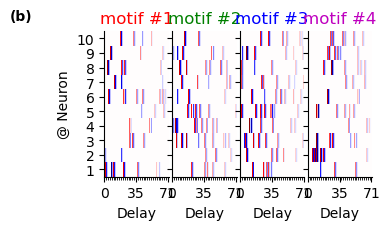

In [42]:
fig, axs = env_fig1.plot_PG(PG, colors=colors)
fig.text(shift, 1.05,'(b)', horizontalalignment='center', verticalalignment='center', weight='bold')
if not figpath is None: printfig(fig, 'figure_1b.pdf')
plt.show()

Then from the following raster plot, each PG described if the figure above will be selective to the spatio-temporal pattern of the same color: 

In [ ]:
fig, ax = env_fig1.plot_b(b, colors=colors, yticks=env_fig1.opt.N_PGs)

In [ ]:
fig, ax = env_fig1.plot_b(b, colors=colors, figsize=figsize, subplotpars=subplotpars_fig1, yticks=env_fig1.opt.N_PGs)
fig.text(shift, 0.95,'(c)', horizontalalignment='center', verticalalignment='center', weight='bold')

if not figpath is None: printfig(fig, 'figure_1c')